In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import json
from glob import glob

In [ ]:
results_folder = # path to the folder containing the json files stroing results

json_files = glob(results_folder + '*/*.json')
print(json_files)

def reading_json(filename):

    with open(filename) as f:
        data = json.load(f)
    
    ret_steps = []
    ret_acc = []

    for k, v in data.items():
        ret_steps.append(int(k.split('_')[-1]))
        ret_acc.append(v)

    sorted_idx = np.argsort(ret_steps)
    ret_steps = np.array(ret_steps)[sorted_idx]
    ret_acc = np.array(ret_acc)[sorted_idx]

    return {'steps': ret_steps, 'acc': ret_acc}

meta = {"c8":{}, "c10":{}}
for fl in json_files:
    data = reading_json(fl)

    setting = fl.split('/')[-2].split('D5')[-1]

    if 'C8' in fl:
        meta["c8"][setting] = data
    else:
        meta["c10"][setting] = data

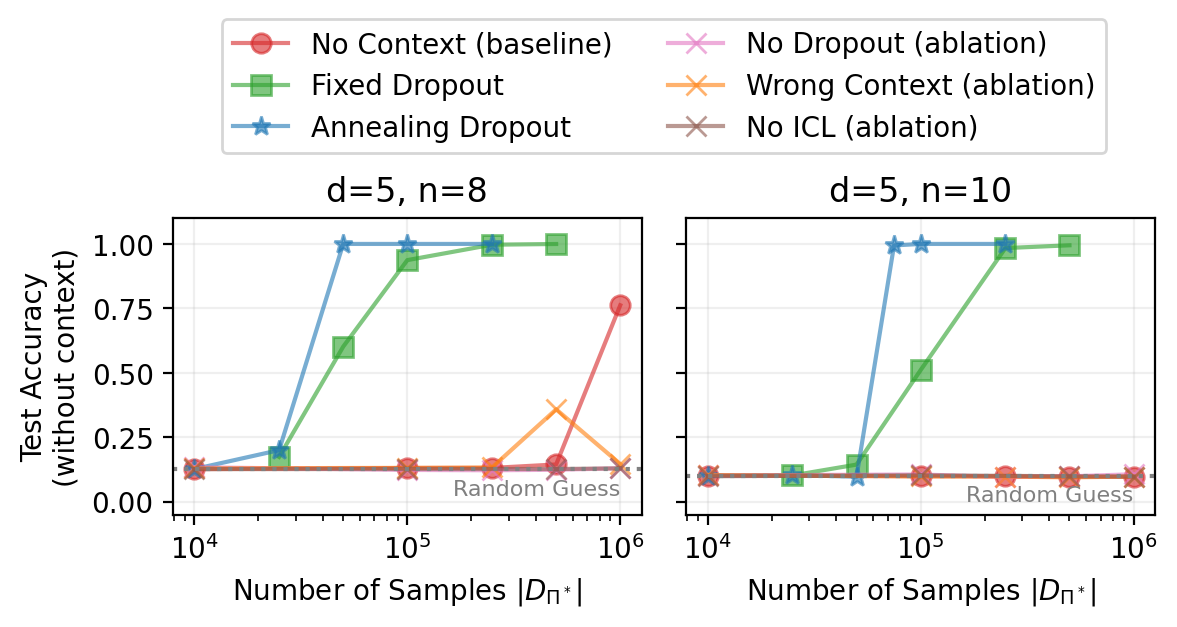

In [4]:

plt.figure(figsize=(6, 3.2), dpi=200)
gs = plt.GridSpec(2, 2, height_ratios=[1, 4])


colors = {
    '-fakedesc': 'tab:orange',
    '-nodropout': 'tab:pink',
    '-noicl': 'tab:brown',
    '_fix20': 'tab:green',
    '-nodesc': 'tab:red',
    '-annealdrop': 'tab:blue'
}

markers = {
    '-fakedesc': 'x',
    '-nodropout': 'x',
    '-noicl': 'x',
    '_fix20': 's',
    '-nodesc': 'o',
    '-annealdrop': '*'
}

legend_names = {
    '-fakedesc': 'Wrong Context (ablation)',
    '-nodropout': 'No Dropout (ablation)',
    '-noicl': 'No ICL (ablation)',
    '_fix20': 'Fixed Dropout',
    '-nodesc': 'No Context (baseline)',
    '-annealdrop': 'Annealing Dropout'
}

key_orders = [
    '-nodesc',
    '_fix20',
    '-annealdrop',
    '-nodropout',
    '-fakedesc',
    '-noicl',
]

# First row reserved for legend

ax1 = plt.subplot(gs[1, 0])
ax1.set_title("d=5, n=8")
for k in key_orders:
    v = meta['c8'][k]
    ax1.plot(v['steps'], v['acc'], label=legend_names[k], marker=markers[k], color=colors[k], alpha=0.6, markersize=7)
ax1.axhline(y=0.125, color='gray', linestyle=':')
ax1.set_xscale('log')
ax1.set_ylabel("Test Accuracy\n(without context)")
ax1.set_xlabel(r"Number of Samples $|D_{\Pi^*}|$")
ax1.text(1e6, 0.05, 'Random Guess', color='gray', fontsize=8, va='center', ha='right')
ax1.set_ylim([-0.05, 1.1])
ax1.set_yticks([0, 0.25, 0.5, 0.75, 1])
ax1.grid(True, alpha=0.2)

ax2 = plt.subplot(gs[1, 1])
ax2.set_title("d=5, n=10")
for k in key_orders:
    v = meta['c10'][k]
    ax2.plot(v['steps'], v['acc'], label=legend_names[k], marker=markers[k], color=colors[k], alpha=0.6, markersize=7)
ax2.axhline(y=0.1, color='gray', linestyle=':')
ax2.text(1e6, 0.025, 'Random Guess', color='gray', fontsize=8, va='center', ha='right')
ax2.set_xscale('log')
# ax2.set_ylabel("Accuracy (w/ no context)")
ax2.set_yticklabels([])
ax2.set_yticks([0, 0.25, 0.5, 0.75, 1])
ax2.set_xlabel(r"Number of Samples $|D_{\Pi^*}|$")
ax2.set_ylim([-0.05, 1.1])
ax2.grid(True, alpha=0.2)

legend_ax = plt.subplot(gs[0, :])
legend_ax.axis('off')
legend_ax.legend(*ax2.get_legend_handles_labels(), loc='center', ncol=2)

plt.tight_layout()
plt.savefig('sample_efficiency.pdf', bbox_inches='tight', pad_inches=0)

plt.show()